### Εισαγωγή Δεδομένων

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [73]:
res = pd.read_csv("time/times.csv")

In [74]:
res.head()

,execTime,Q1total,Q1postRead,Q2total,Q2postRead,Q3APItotal,Q3APIpostRead,Q3RDDtotal,Q3RDDpostRead,Q4total,Q4postRead,Q5total,Q5postRead
0,2022-12-05 16:12:54.683631,19.704653,10.763800,12.636370,8.213480,13.373835,8.959898,53.830495,53.785581,16.734976,12.203792,21.206742,16.985536
1,2022-12-05 16:42:54.711275,14.196103,9.528182,12.097590,7.820158,13.133492,8.778432,53.336779,53.315608,15.649253,11.225047,20.769389,16.447132
2,2022-12-05 17:12:54.801442,13.634023,9.138589,11.395861,7.138965,12.752657,8.278484,53.902633,53.883040,16.275084,11.951972,21.270762,16.817474
3,2022-12-05 17:42:54.901519,13.918021,9.182426,12.178711,7.741117,13.033265,8.755395,54.402882,54.376927,16.755606,12.395446,20.629254,16.175179
4,2022-12-05 18:12:55.001658,15.381623,9.220688,11.783943,7.491838,13.063667,8.597147,53.265701,53.248776,17.294991,12.886675,21.111930,16.719438


### Υπολογισμός χρόνων εκτέλεσης με χρήση 2 worker:

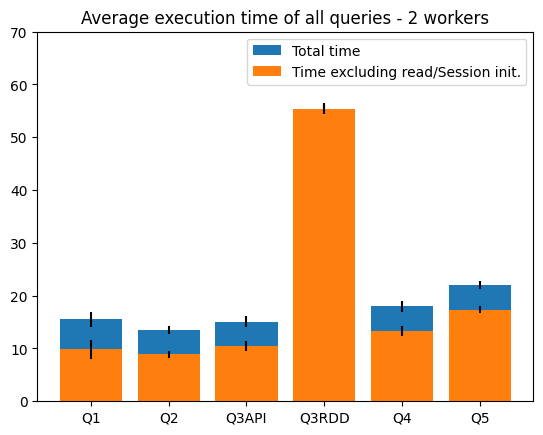

In [75]:
ress=res.drop(["execTime","Q1postRead","Q2postRead",'Q3APIpostRead',
    'Q3RDDpostRead',"Q4postRead","Q5postRead"],axis=1)
meant = ress.mean()
stdt = ress.std()
ress=res.drop(["execTime","Q1total","Q2total",'Q3APItotal',
    'Q3RDDtotal',"Q4total","Q5total"],axis=1)
meanar = ress.mean()
stdar = ress.std()
labels = ["Q1","Q2","Q3API","Q3RDD","Q4","Q5",]
plt.bar(labels,meant,yerr=stdt,label="Total time")
plt.bar(labels,meanar,yerr=stdar,label="Time excluding read/Session init.")
plt.title("Average execution time of all queries - 2 workers")
plt.ylim(0,70)
plt.legend()

In [76]:
import datetime
hours = res.execTime.apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f").hour)
days = res.execTime.apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f").weekday())
res["hours"]=hours
res["days"]=days

In [77]:
byhour=res.drop(["execTime","days"],axis=1).groupby(res.hours).aggregate("mean")
byhour2=res.drop(["execTime","days"],axis=1).groupby(res.hours).aggregate("std")
byweekday = res.drop(["execTime","hours"],axis=1).groupby(res.days).aggregate("mean")
byweekday2 = res.drop(["execTime","hours"],axis=1).groupby(res.days).aggregate("std")


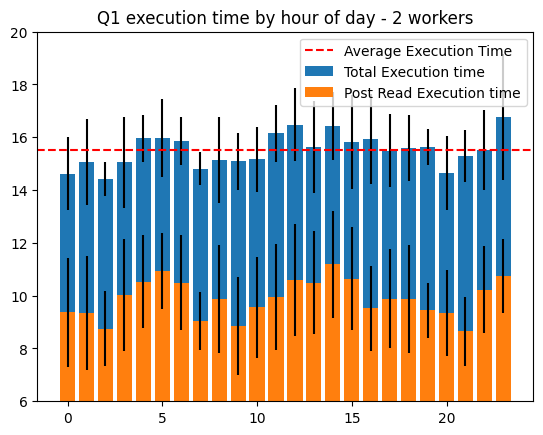

In [78]:
plt.bar(byhour.index,byhour.Q1total,yerr=byhour2.Q1total,label="Total Execution time")
plt.bar(byhour.index,byhour.Q1postRead,yerr=byhour2.Q1postRead,label="Post Read Execution time")
plt.axhline(y=byhour.Q1total.mean(),label="Average Execution Time",linestyle="dashed",color="red")
plt.ylim(6,20)
plt.title("Q1 execution time by hour of day - 2 workers")
plt.legend()

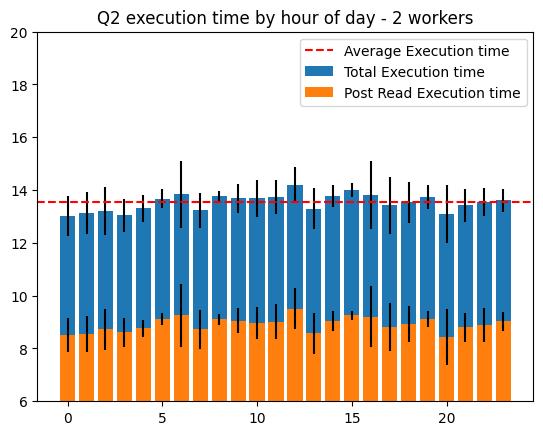

In [79]:
plt.bar(byhour.index,byhour.Q2total,yerr=byhour2.Q2total,label="Total Execution time")
plt.bar(byhour.index,byhour.Q2postRead,yerr=byhour2.Q2postRead,label="Post Read Execution time")
plt.axhline(y=byhour.Q2total.mean(),label="Average Execution time",linestyle="dashed",color="red")
plt.ylim(6,20)
plt.title("Q2 execution time by hour of day - 2 workers")
plt.legend()

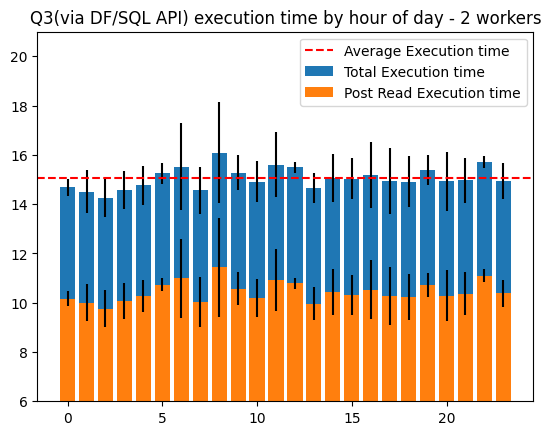

In [80]:
plt.bar(byhour.index,byhour.Q3APItotal,yerr=byhour2.Q3APItotal,label="Total Execution time")
plt.bar(byhour.index,byhour.Q3APIpostRead,yerr=byhour2.Q3APIpostRead,label="Post Read Execution time")
plt.axhline(y=byhour.Q3APItotal.mean(),label="Average Execution time",linestyle="dashed",color="red")
plt.ylim(6,21)
plt.title("Q3(via DF/SQL API) execution time by hour of day - 2 workers")
plt.legend()

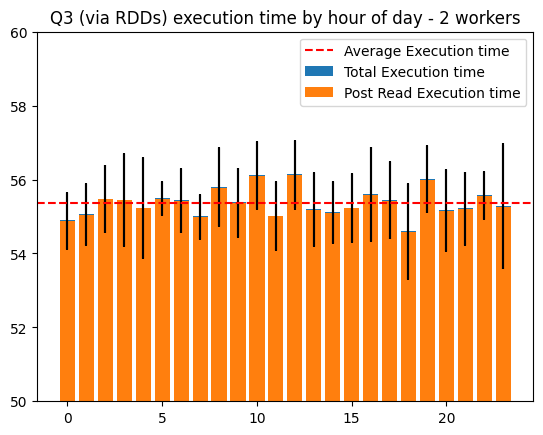

In [81]:
plt.bar(byhour.index,byhour.Q3RDDtotal,yerr=byhour2.Q3RDDtotal,label="Total Execution time")
plt.bar(byhour.index,byhour.Q3RDDpostRead,yerr=byhour2.Q3RDDpostRead,label="Post Read Execution time")
plt.axhline(y=byhour.Q3RDDtotal.mean(),label="Average Execution time",linestyle="dashed",color="red")
plt.ylim(50,60)
plt.title("Q3 (via RDDs) execution time by hour of day - 2 workers")
plt.legend()

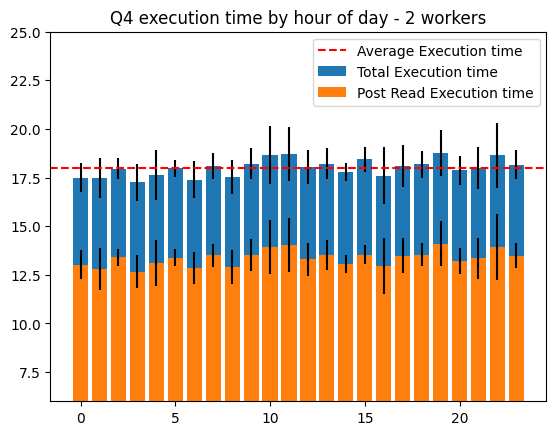

In [82]:
plt.bar(byhour.index,byhour.Q4total,yerr=byhour2.Q4total,label="Total Execution time")
plt.bar(byhour.index,byhour.Q4postRead,yerr=byhour2.Q4postRead,label="Post Read Execution time")
plt.axhline(y=byhour.Q4total.mean(),label="Average Execution time",linestyle="dashed",color="red")
plt.ylim(6,25)
plt.title("Q4 execution time by hour of day - 2 workers")
plt.legend()

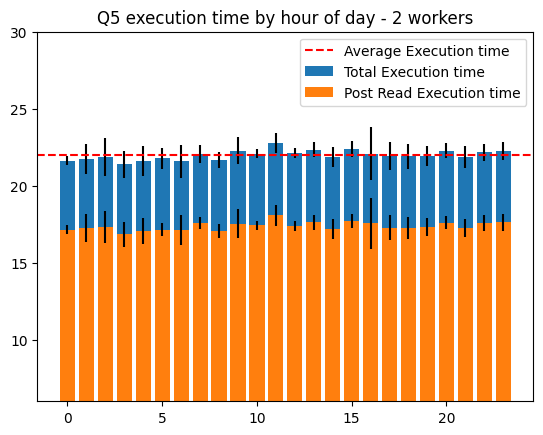

In [83]:
plt.bar(byhour.index,byhour.Q5total,yerr=byhour2.Q5total,label="Total Execution time")
plt.bar(byhour.index,byhour.Q5postRead,yerr=byhour2.Q5postRead,label="Post Read Execution time")
plt.axhline(y=byhour.Q5total.mean(),label="Average Execution time",linestyle="dashed",color="red")
plt.ylim(6,30)
plt.title("Q5 execution time by hour of day - 2 workers")
plt.legend()

In [84]:
res = pd.read_csv("time/times1w.csv")

In [85]:
res.head()

,execTime,Q1total,Q1postRead,Q2total,Q2postRead,Q3APItotal,Q3APIpostRead,Q3RDDtotal,Q3RDDpostRead,Q4total,Q4postRead,Q5total,Q5postRead
0,2022-12-08 00:11:25.899580,24.079520,14.266954,15.005948,9.944941,18.405446,13.327666,102.993204,102.916325,20.183939,15.029443,29.699146,25.006999
1,2022-12-08 00:26:25.985779,16.600918,11.365898,14.870469,9.631443,17.308532,12.388556,100.989246,100.970099,20.128591,14.833528,33.533733,28.674152


### Υπολογισμός χρόνων εκτέλεσης με χρήση 1 worker:

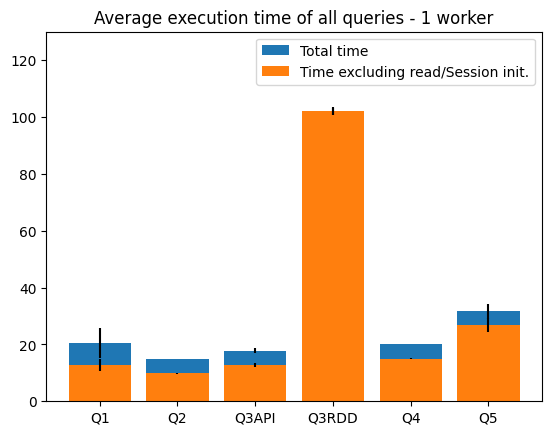

In [86]:
ress=res.drop(["execTime","Q1postRead","Q2postRead",'Q3APIpostRead',
    'Q3RDDpostRead',"Q4postRead","Q5postRead"],axis=1)
meant = ress.mean()
stdt = ress.std()
ress=res.drop(["execTime","Q1total","Q2total",'Q3APItotal',
    'Q3RDDtotal',"Q4total","Q5total"],axis=1)
meanar = ress.mean()
stdar = ress.std()
labels = ["Q1","Q2","Q3API","Q3RDD","Q4","Q5",]
plt.bar(labels,meant,yerr=stdt,label="Total time")
plt.bar(labels,meanar,yerr=stdar,label="Time excluding read/Session init.")
plt.title("Average execution time of all queries - 1 worker")
plt.ylim(0,130)
plt.legend()

In [87]:
import datetime
hours = res.execTime.apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f").hour)
days = res.execTime.apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f").weekday())
res["hours"]=hours
res["days"]=days

In [88]:
byhour=res.drop(["execTime","days"],axis=1).groupby(res.hours).aggregate("mean")
byhour2=res.drop(["execTime","days"],axis=1).groupby(res.hours).aggregate("std")
byweekday = res.drop(["execTime","hours"],axis=1).groupby(res.days).aggregate("mean")
byweekday2 = res.drop(["execTime","hours"],axis=1).groupby(res.days).aggregate("std")


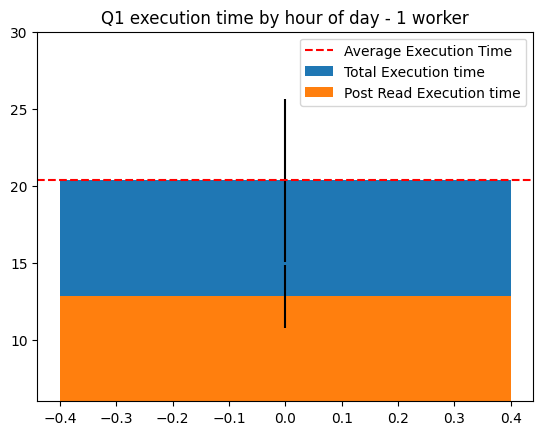

In [89]:
plt.bar(byhour.index,byhour.Q1total,yerr=byhour2.Q1total,label="Total Execution time")
plt.bar(byhour.index,byhour.Q1postRead,yerr=byhour2.Q1postRead,label="Post Read Execution time")
plt.axhline(y=byhour.Q1total.mean(),label="Average Execution Time",linestyle="dashed",color="red")
plt.ylim(6,30)
plt.title("Q1 execution time by hour of day - 1 worker")
plt.legend()

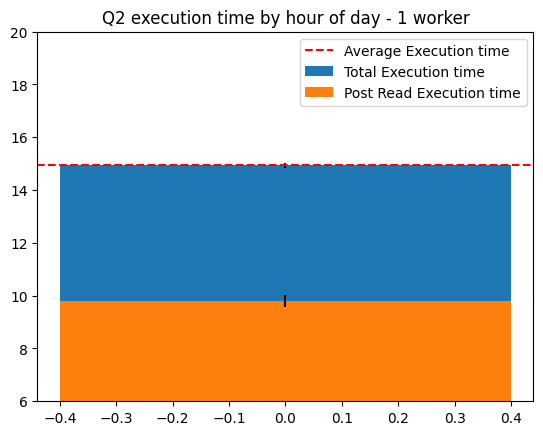

In [90]:
plt.bar(byhour.index,byhour.Q2total,yerr=byhour2.Q2total,label="Total Execution time")
plt.bar(byhour.index,byhour.Q2postRead,yerr=byhour2.Q2postRead,label="Post Read Execution time")
plt.axhline(y=byhour.Q2total.mean(),label="Average Execution time",linestyle="dashed",color="red")
plt.ylim(6,20)
plt.title("Q2 execution time by hour of day - 1 worker")
plt.legend()

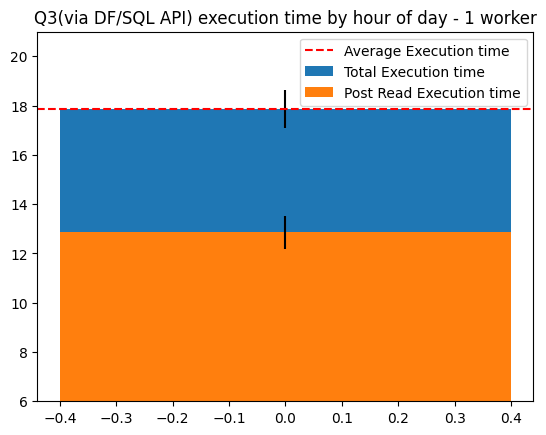

In [91]:
plt.bar(byhour.index,byhour.Q3APItotal,yerr=byhour2.Q3APItotal,label="Total Execution time")
plt.bar(byhour.index,byhour.Q3APIpostRead,yerr=byhour2.Q3APIpostRead,label="Post Read Execution time")
plt.axhline(y=byhour.Q3APItotal.mean(),label="Average Execution time",linestyle="dashed",color="red")
plt.ylim(6,21)
plt.title("Q3(via DF/SQL API) execution time by hour of day - 1 worker")
plt.legend()

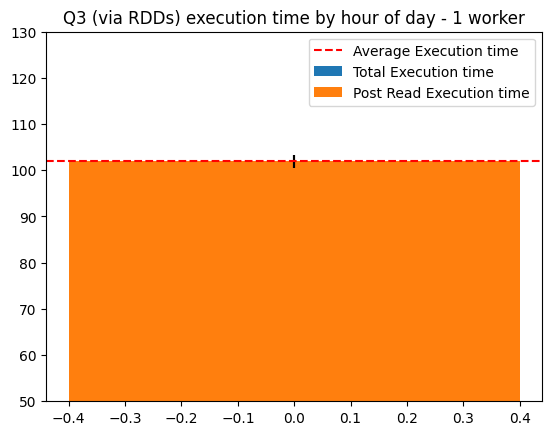

In [92]:
plt.bar(byhour.index,byhour.Q3RDDtotal,yerr=byhour2.Q3RDDtotal,label="Total Execution time")
plt.bar(byhour.index,byhour.Q3RDDpostRead,yerr=byhour2.Q3RDDpostRead,label="Post Read Execution time")
plt.axhline(y=byhour.Q3RDDtotal.mean(),label="Average Execution time",linestyle="dashed",color="red")
plt.ylim(50,130)
plt.title("Q3 (via RDDs) execution time by hour of day - 1 worker")
plt.legend()

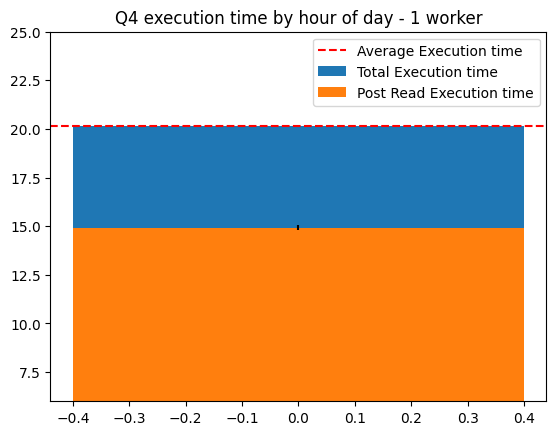

In [93]:
plt.bar(byhour.index,byhour.Q4total,yerr=byhour2.Q4total,label="Total Execution time")
plt.bar(byhour.index,byhour.Q4postRead,yerr=byhour2.Q4postRead,label="Post Read Execution time")
plt.axhline(y=byhour.Q4total.mean(),label="Average Execution time",linestyle="dashed",color="red")
plt.ylim(6,25)
plt.title("Q4 execution time by hour of day - 1 worker")
plt.legend()

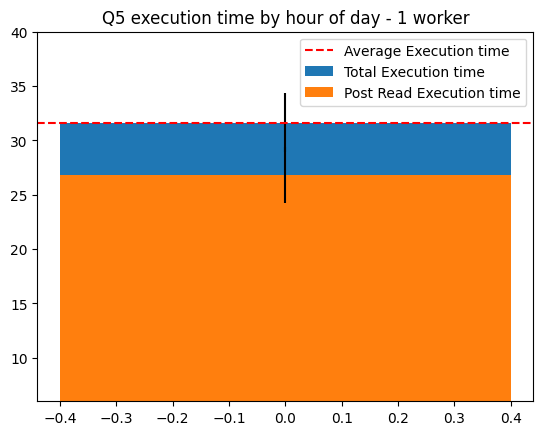

In [94]:
plt.bar(byhour.index,byhour.Q5total,yerr=byhour2.Q5total,label="Total Execution time")
plt.bar(byhour.index,byhour.Q5postRead,yerr=byhour2.Q5postRead,label="Post Read Execution time")
plt.axhline(y=byhour.Q5total.mean(),label="Average Execution time",linestyle="dashed",color="red")
plt.ylim(6,40)
plt.title("Q5 execution time by hour of day - 1 worker")
plt.legend()